## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing necessary libraries

In [ ]:
pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 31.8 MB/s 
     |████████████████████████████████| 96 kB 4.7 MB/s 
     |████████████████████████████████| 843 kB 49.7 MB/s 
     |████████████████████████████████| 1.6 MB 34.6 MB/s 
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5297 sha256=67a6afa5b6beffdf4c41e676e72e0eafc71f7b60aaffc1206b433bb6500dd9b3
  Stored in directory: /root/.cache/pip/wheels/1e/b2/88/51c66d23ea5fd0d40ed50997555e15d981d92671376a9a412a
Successfully built nb-black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

## Importing Dataset

In [ ]:
visa = pd.read_csv('/content/drive/MyDrive/Ensemble Techniques /EasyVisa.csv') ##  Fill the blank to read the data

<IPython.core.display.Javascript object>

In [ ]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

<IPython.core.display.Javascript object>

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [ ]:
data.head().T ##  Complete the code to view top 5 rows of the data

,0,1,2,3,4
case_id,EZYV01,EZYV02,EZYV03,EZYV04,EZYV05
continent,Asia,Asia,Asia,Asia,Africa
education_of_employee,High School,Master's,Bachelor's,Bachelor's,Master's
has_job_experience,N,Y,N,N,Y
requires_job_training,N,N,Y,N,N
no_of_employees,14513,2412,44444,98,1082
yr_of_estab,2007,2002,2008,1897,2005
region_of_employment,West,Northeast,West,West,South
prevailing_wage,592.2029,83425.65,122996.86,83434.03,149907.39
unit_of_wage,Hour,Year,Year,Year,Year


<IPython.core.display.Javascript object>

In [ ]:
data.tail().T ##  Complete the code to view last 5 rows of the data  

,25475,25476,25477,25478,25479
case_id,EZYV25476,EZYV25477,EZYV25478,EZYV25479,EZYV25480
continent,Asia,Asia,Asia,Asia,Asia
education_of_employee,Bachelor's,High School,Master's,Master's,Bachelor's
has_job_experience,Y,Y,Y,Y,Y
requires_job_training,Y,N,N,Y,N
no_of_employees,2601,3274,1121,1918,3195
yr_of_estab,2008,2006,1910,1887,1960
region_of_employment,South,Northeast,South,West,Midwest
prevailing_wage,77092.57,279174.79,146298.85,86154.77,70876.91
unit_of_wage,Year,Year,Year,Year,Year


<IPython.core.display.Javascript object>

### Understand the shape of the dataset

In [ ]:
data.shape ##  Complete the code to view dimensions of the data

(25480, 12)

<IPython.core.display.Javascript object>

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [ ]:
# checking for duplicate values
data.duplicated().value_counts() ##  Complete the code to check duplicate entries in the data

False    25480
dtype: int64

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [ ]:
data.describe() ##  Complete the code to print the statistical summary of the data

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


<IPython.core.display.Javascript object>

#### Fixing the negative values in number of employees columns

In [ ]:
data.loc[data['no_of_employees'] < 0,'no_of_employees'].shape ## Complete the code to check negative values in the employee column

(33,)

<IPython.core.display.Javascript object>

In [ ]:
# taking the absolute values for number of employees
data["no_of_employees"] = data["no_of_employees"].abs() ## Write the function to convert the values to a positive number

<IPython.core.display.Javascript object>

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

<IPython.core.display.Javascript object>

In [ ]:
# checking the number of unique values
data["case_id"].unique() ## Complete the code to check unique values in the mentioned column

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)

<IPython.core.display.Javascript object>

In [ ]:
data.drop(["case_id"], axis=1, inplace=True) ## Complete the code to drop 'case_id' column from the data

<IPython.core.display.Javascript object>

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Observations on number of employees

In [ ]:
histogram_boxplot(data, "no_of_employees")

#### Observations on prevailing wage

In [ ]:
histogram_boxplot(data,"prevailing_wage") ## Complete the code to create histogram_boxplot for prevailing wage

In [ ]:
# checking the observations which have less than 100 prevailing wage
data.loc[data["prevailing_wage"] < 100] ## Complete the code to find the rows with less than 100 prevailing wage

In [ ]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts() ## Complete the code to get the count of the values in the mentioned column

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

In [ ]:
labeled_barplot(data, "continent", perc=True) 

#### Observations on education of employee

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)  ## Complete the code to create labeled_barplot for education of employee

#### Observations on job experience

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)  ## Complete the code to create labeled_barplot for job experience

#### Observations on job training

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)  ## Complete the code to create labeled_barplot for job training 

#### Observations on region of employment

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)  ## Complete the code to create labeled_barplot for region of employment

#### Observations on unit of wage

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)  ## Complete the code to create labeled_barplot for unit of wage

#### Observations on case status

In [ ]:
labeled_barplot(data, "case_status", perc=True)  ## Complete the code to create labeled_barplot for case status

### Bivariate Analysis

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data["education_of_employee"],data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis"
) ## Complete the code to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

#### Let's have a look at the percentage of visa certifications across each region

In [ ]:
stacked_barplot(data, "region_of_employment", "case_status") ## Complete the code to plot stacked barplot for region of employment and case status

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

In [ ]:
stacked_barplot(data, "continent", "case_status") ## Complete the code to plot stacked barplot for continent and case status

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification 

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status") ## Complete the code to plot stacked barplot for job experience and case status

#### Do the employees who have prior work experience require any job training?

In [ ]:
stacked_barplot(data, "has_job_experience", "requires_job_training") ## Complete the code to plot stacked barplot for job experience and requires_job_training

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status") ## Complete the code to find distribution of prevailing wage and case status

#### Checking if the prevailing wage is similar across all the regions of the US

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage") ## Complete the code to create boxplot for region of employment and prevailing wage
plt.show()

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


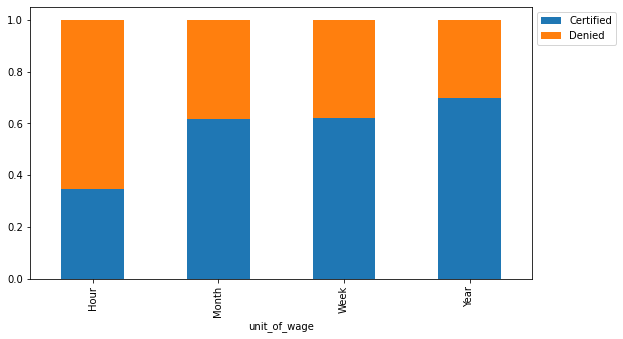

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status") ## Complete the code to plot stacked barplot for unit of wage and case status

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

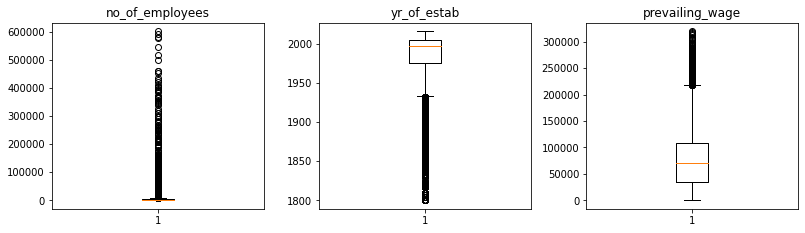

<IPython.core.display.Javascript object>

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1) ## Complete the code to create boxplots for all the numeric columns
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(["case_status"], axis=1) ## Complete the code to drop case status from the data
Y = data["case_status"]


X = pd.get_dummies(X, drop_first=True)  ## Complete the code to create dummies for X 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y) ## Complete the code to split the data into train and test in the ratio 70:30

<IPython.core.display.Javascript object>

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(random_state=1) ## Complete the code to define decision tree classifier with random state = 1
model.fit(X_train, y_train) ## Complete the code to fit decision tree classifier on the train data 

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

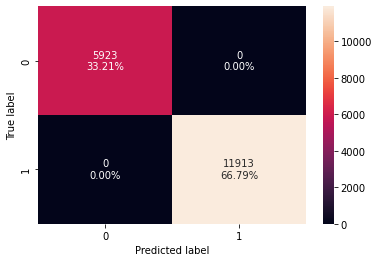

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking model performance on test set

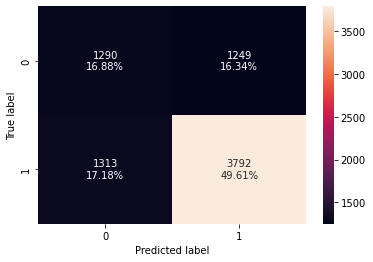

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to check performance on test data

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Decision Tree

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1) ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

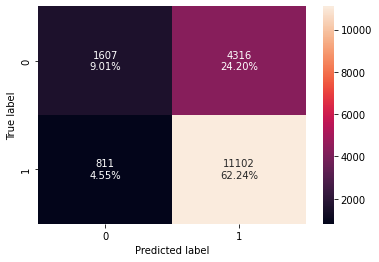

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test) ## Complete the code to check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


<IPython.core.display.Javascript object>

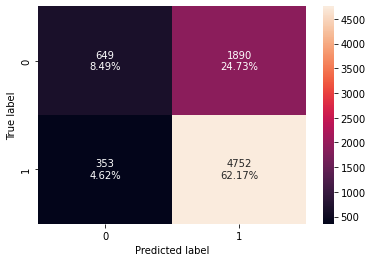

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


<IPython.core.display.Javascript object>

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [ ]:
from pandas.core.common import random_state
bagging_classifier = BaggingClassifier(random_state=1) ## Complete the code to define bagging classifier with random state = 1
bagging_classifier.fit(X_train, y_train) ## Complete the code to fit bagging classifier on the train data

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

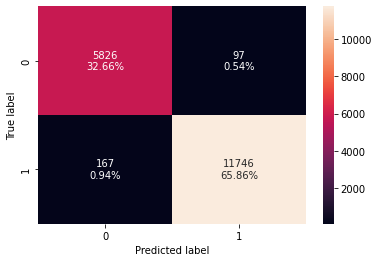

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train) ## Complete the code to check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


<IPython.core.display.Javascript object>

#### Checking model performance on test set

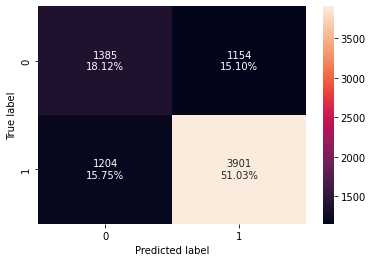

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test) ## Complete the code to check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Bagging Classifier

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)  ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

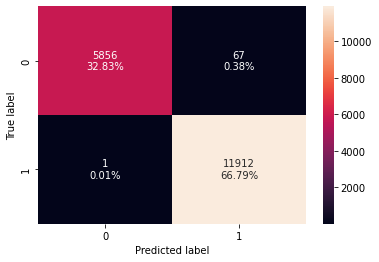

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


<IPython.core.display.Javascript object>

#### Checking model performance on test set

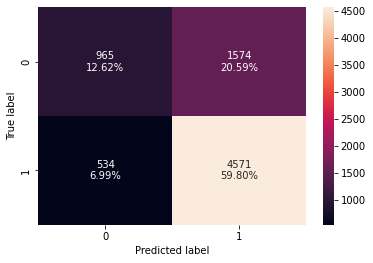

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


<IPython.core.display.Javascript object>

### Random Forest

In [ ]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight="balanced") ## Complete the code to define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(X_train, y_train)                                             ## Complete the code to fit random forest on the train data

RandomForestClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

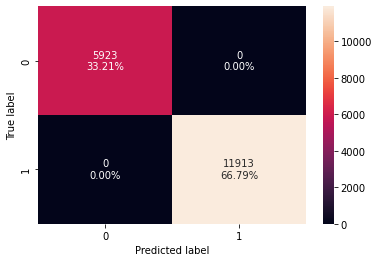

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train) ## Complete the code to check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking model performance on test set

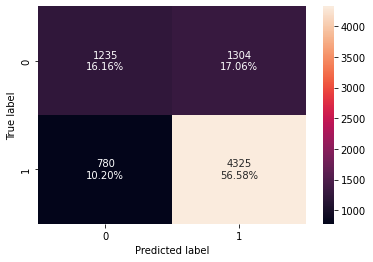

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test) ## Complete the code to check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1) ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train)    ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

#### Checking model performance on training set

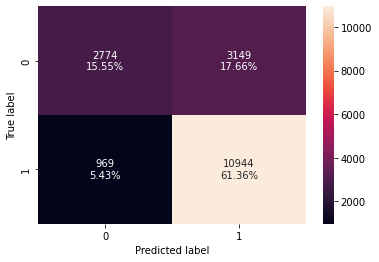

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


<IPython.core.display.Javascript object>

#### Checking model performance on test set

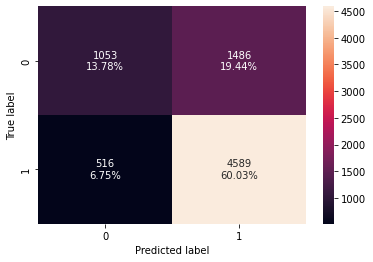

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
rf_tuned_model_test_perf

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1) ## Complete the code to define AdaBoost Classifier with random state = 1
ab_classifier.fit(X_train, y_train) ## Complete the code to fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

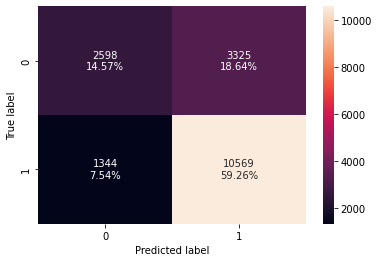

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train) ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


<IPython.core.display.Javascript object>

#### Checking model performance on test set

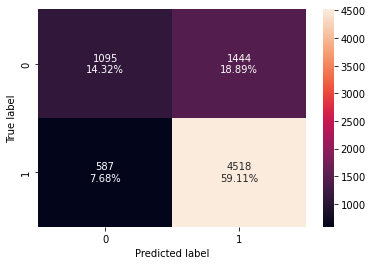

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test) ## Complete the code to check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

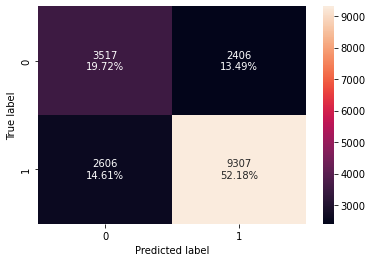

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


<IPython.core.display.Javascript object>

#### Checking model performance on test set

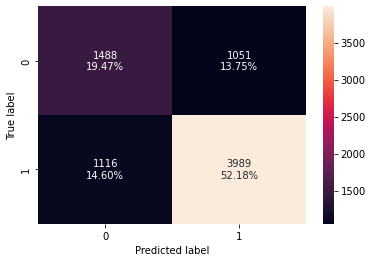

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


<IPython.core.display.Javascript object>

### Gradient Boosting Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1) ## Complete the code to define Gradient Boosting Classifier with random state = 1
gb_classifier.fit(X_train, y_train) ## Complete the code to fit Gradient Boosting Classifier on the train data

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

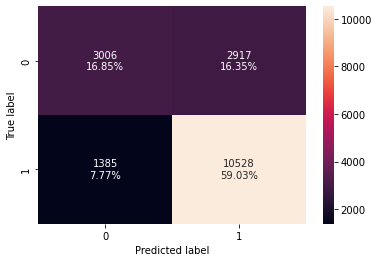

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)  ## Complete the code to create confusion matrix for train data

In [ ]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train) ## Complete the code to check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


<IPython.core.display.Javascript object>

#### Checking model performance on test set

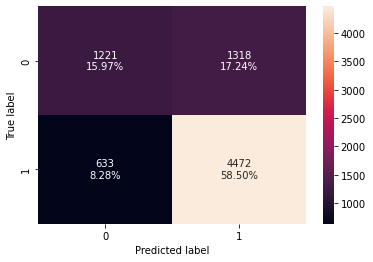

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test) ## Complete the code to check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

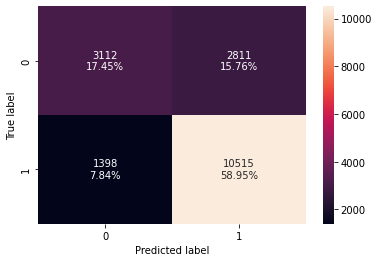

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


<IPython.core.display.Javascript object>

#### Checking model performance on test set

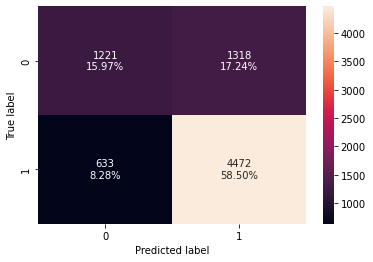

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


<IPython.core.display.Javascript object>

### Note - You can choose **not to build** XGBoost if you have any installation issues

### XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss") ## Complete the code to define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier.fit(X_train, y_train) ## Complete the code to fit XGBoost Classifier on the train data

XGBClassifier(eval_metric='logloss', random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

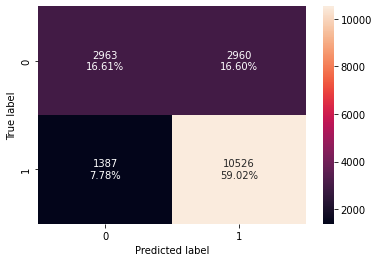

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train) ## Complete the code to check performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.756279,0.883573,0.780513,0.828852


<IPython.core.display.Javascript object>

#### Checking model performance on test set

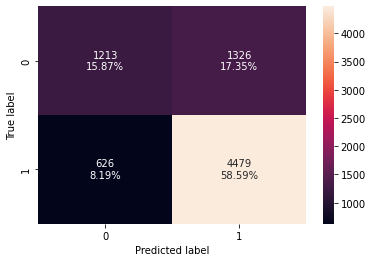

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test) ## Complete the code to check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744636,0.877375,0.771576,0.821082


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', gamma=5, n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

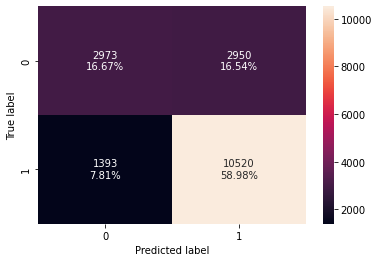

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.756504,0.883069,0.780995,0.828901


<IPython.core.display.Javascript object>

#### Checking model performance on test set

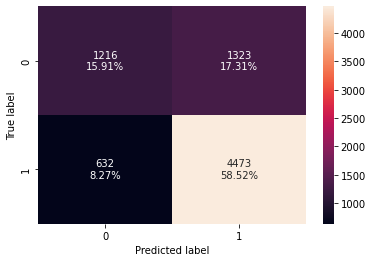

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744244,0.8762,0.771739,0.820659


<IPython.core.display.Javascript object>

## Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator) ## Complete the code to define Stacking Classifier

stacking_classifier.fit(X_train, y_train) ## Complete the code to fit Stacking Classifier on the train data

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                  

<IPython.core.display.Javascript object>

### Checking model performance on training set

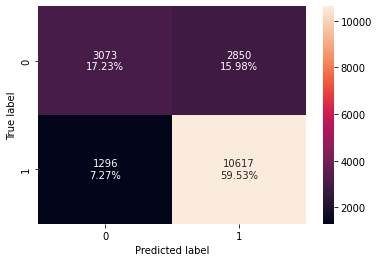

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test) ## Complete the code to check performance on train data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.744244,0.8762,0.771739,0.820659


<IPython.core.display.Javascript object>

### Checking model performance on test set

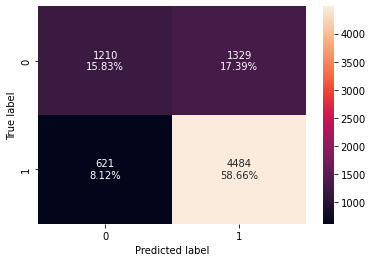

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test) ## Complete the code to check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744898,0.878355,0.771375,0.821396


<IPython.core.display.Javascript object>

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_estimator_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df ## Complete the code to check performance for test data

Testing performance comparison:


,0,0,0,0,0,0,0,0,0,0,0,0,0
Accuracy,0.706567,0.706567,0.691523,0.724228,0.727368,0.738095,0.734301,0.716510,0.744767,0.744767,0.744636,0.744244,0.744898
Recall,0.930852,0.930852,0.764153,0.895397,0.847209,0.898923,0.885015,0.781391,0.876004,0.876004,0.877375,0.876200,0.878355
Precision,0.715447,0.715447,0.771711,0.743857,0.768343,0.755391,0.757799,0.791468,0.772366,0.772366,0.771576,0.771739,0.771375
F1,0.809058,0.809058,0.767913,0.812622,0.805851,0.820930,0.816481,0.786397,0.820927,0.820927,0.821082,0.820659,0.821396


<IPython.core.display.Javascript object>

### Important features of the final model

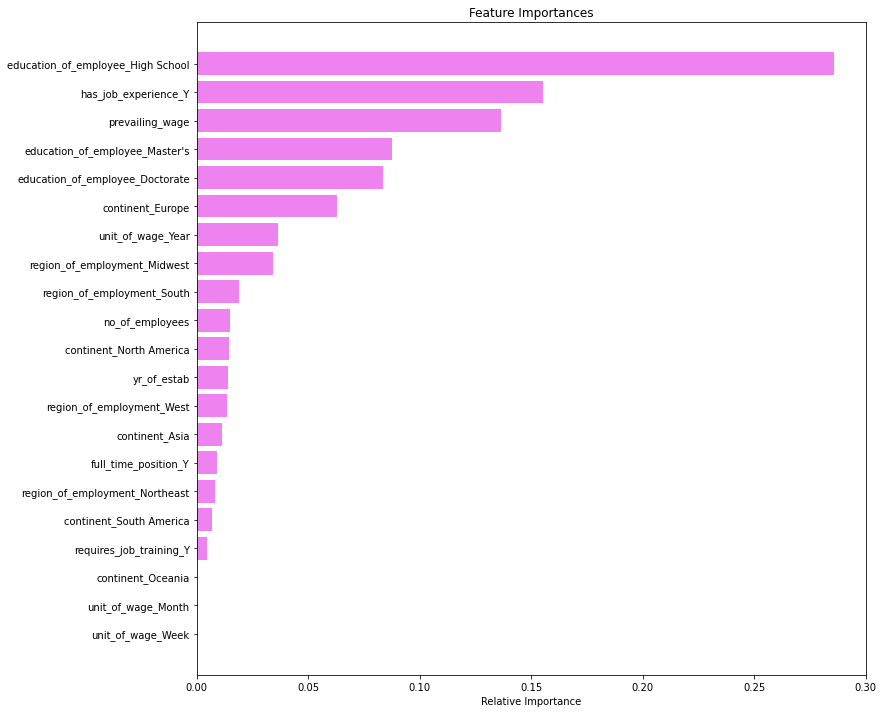

<IPython.core.display.Javascript object>

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Business Insights and Recommendations

- 


___